In [1]:
from HardDisks import HardDisks
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Parameters
N = 16           # Number of disks
q = 1.0          # Step size
L = 10.0         # Box size
sigma = 0.5      # Disk radius
steps = 1000     # Number of Metropolis steps

# Create the HardDisks system
system = HardDisks(N, q, L, sigma, initial_conf='rectangular')

# Plot initial configuration
system.plot(title="Initial Configuration")

# Simulate the system
system.simulate(steps)

# Plot final configuration
system.plot(title="Final Configuration after Metropolis")


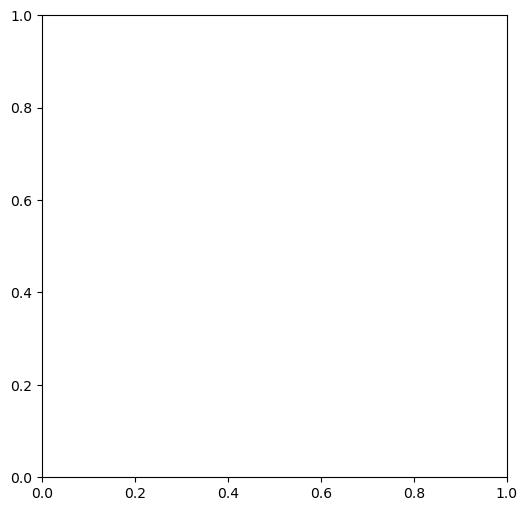

In [22]:
fig, ax = plt.subplots(1,1, figsize=(6,6))

# N should be a perfect square to start from rectangular configuration
N = np.asarray([4,9, 16, 25, 36, 49, 64, 81]) 
q = np.linspace(0.2, 10, 20)
steps = 1000

acceptance_rate = np.zeros((len(N), len(q)))
eta = np.zeros(len(N))
X, Y = np.meshgrid(eta, q)
for i in range(len(N)):
    for j in range(len(q)):
        system = HardDisks(X[i], Y[j], 100, 2, initial_conf='rectangular')
        rate = system.get_avg_acceptance(steps)
        Z[i,j] = rate
        eta[i] = system.get_packing()

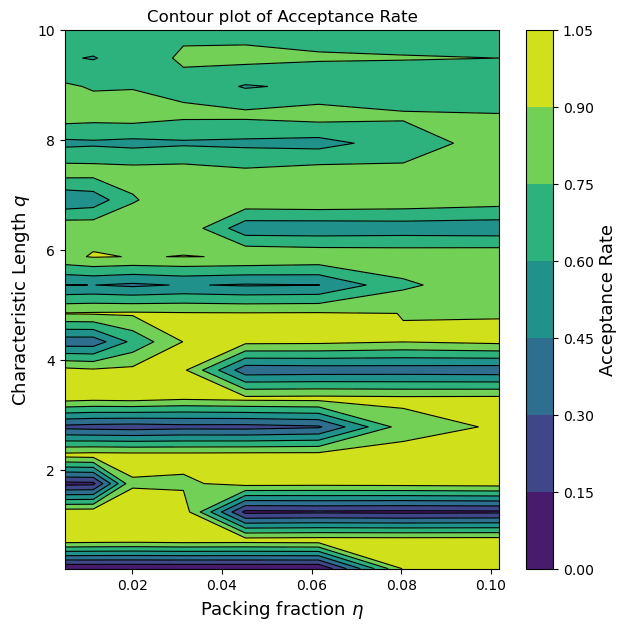

In [23]:
X, Y = np.meshgrid(eta, q)
Z = acceptance_rate.reshape(X.shape)
fig, ax = plt.subplots(1,1, figsize=(7, 7))
ax.set_title('Contour plot of Acceptance Rate')
# ax.contourf(X, Y, Z)

contourf = ax.contourf(X, Y, Z, cmap='viridis')

ax.set_xlabel(r'Packing fraction $\eta$', fontsize=13)
ax.set_ylabel(r'Characteristic Length $q$', fontsize=13)
contour = ax.contour(X, Y, Z, colors='black', linewidths=0.8)
# ax.clabel(contour, inline=True, fontsize=10)  # Add labels to contour lines
cbar = fig.colorbar(contourf, ax=ax)
cbar.set_label('Acceptance Rate', fontsize=13)

In [24]:
print(acceptance_rate)

[[0.    0.    0.    0.    0.    0.    0.911 0.944 0.98  0.972 0.965 0.979
  0.974 0.984 0.982 0.985 0.987 0.991 0.99  0.988]
 [0.109 0.122 0.111 0.12  0.103 0.112 0.883 0.872 0.956 0.95  0.957 0.971
  0.953 0.965 0.959 0.957 0.962 0.963 0.969 0.97 ]
 [0.254 0.239 0.227 0.248 0.244 0.279 0.827 0.92  0.962 0.945 0.957 0.921
  0.943 0.95  0.939 0.943 0.945 0.922 0.937 0.928]
 [0.351 0.361 0.365 0.356 0.358 0.358 0.64  0.904 0.941 0.935 0.903 0.938
  0.909 0.916 0.922 0.913 0.91  0.913 0.899 0.891]
 [0.442 0.452 0.422 0.461 0.435 0.447 0.719 0.868 0.869 0.91  0.896 0.902
  0.896 0.869 0.858 0.864 0.86  0.854 0.863 0.864]
 [0.502 0.501 0.513 0.504 0.476 0.507 0.735 0.855 0.866 0.878 0.859 0.823
  0.828 0.818 0.808 0.813 0.775 0.816 0.782 0.804]
 [0.563 0.575 0.557 0.579 0.567 0.545 0.676 0.817 0.836 0.817 0.833 0.784
  0.785 0.821 0.77  0.757 0.77  0.737 0.74  0.706]
 [0.587 0.63  0.611 0.61  0.615 0.591 0.673 0.771 0.797 0.766 0.761 0.75
  0.732 0.717 0.71  0.722 0.696 0.693 0.658 0.676]]


In [25]:
import numpy as np

# Parameters
N = np.asarray([4, 9, 16, 25, 36, 49, 64, 81])  # Perfect squares
q = np.linspace(0.2, 10, 20)  # Range of q values
steps = 1000  # Number of steps

# Initialize variables
acceptance_rate = np.zeros((len(N), len(q)))  # Acceptance rate grid
eta = np.zeros(len(N))  # Packing fractions
Z = np.zeros((len(N), len(q)))  # Grid for Z values (acceptance rates)

# Loop over N and q to calculate acceptance rate
for i in range(len(N)):
    for j in range(len(q)):
        # Create a system (assuming HardDisks class is defined elsewhere)
        system = HardDisks(N[i], q[j], 100, 2, initial_conf='rectangular')
        
        # Compute acceptance rate and packing fraction
        rate = system.get_avg_acceptance(steps)
        acceptance_rate[i, j] = rate  # Save acceptance rate
        Z[i, j] = rate  # Assign to Z grid
        eta[i] = system.get_packing()  # Save packing fraction

# Create the meshgrid after populating eta
X, Y = np.meshgrid(eta, q)

# Print shapes for debugging
print(f"X.shape: {X.shape}, Y.shape: {Y.shape}, Z.shape: {Z.shape}")


X.shape: (20, 8), Y.shape: (20, 8), Z.shape: (8, 20)


TypeError: Shapes of x (20, 8) and z (8, 20) do not match

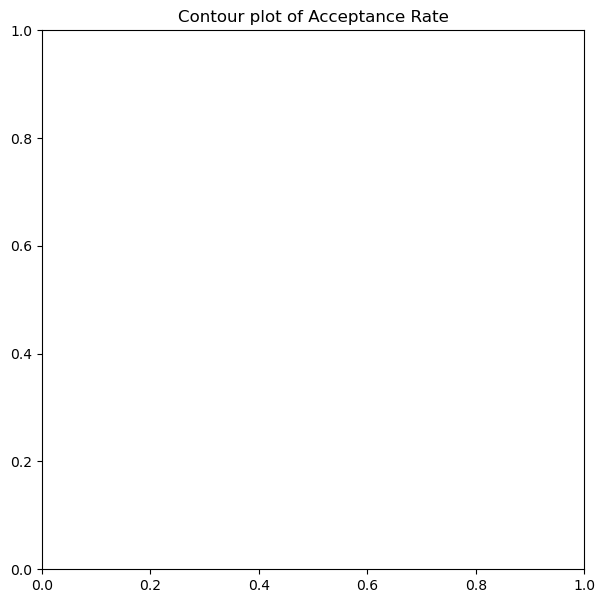

In [27]:
fig, ax = plt.subplots(1,1, figsize=(7, 7))
ax.set_title('Contour plot of Acceptance Rate')
# ax.contourf(X, Y, Z)

contourf = ax.contourf(X, Y, Z, cmap='viridis')

ax.set_xlabel(r'Packing fraction $\eta$', fontsize=13)
ax.set_ylabel(r'Characteristic Length $q$', fontsize=13)
contour = ax.contour(X, Y, , colors='black', linewidths=0.8)
# ax.clabel(contour, inline=True, fontsize=10)  # Add labels to contour lines
cbar = fig.colorbar(contourf, ax=ax)
cbar.set_label('Acceptance Rate', fontsize=13)

X.shape: (8, 20), Y.shape: (8, 20), Z.shape: (8, 20)


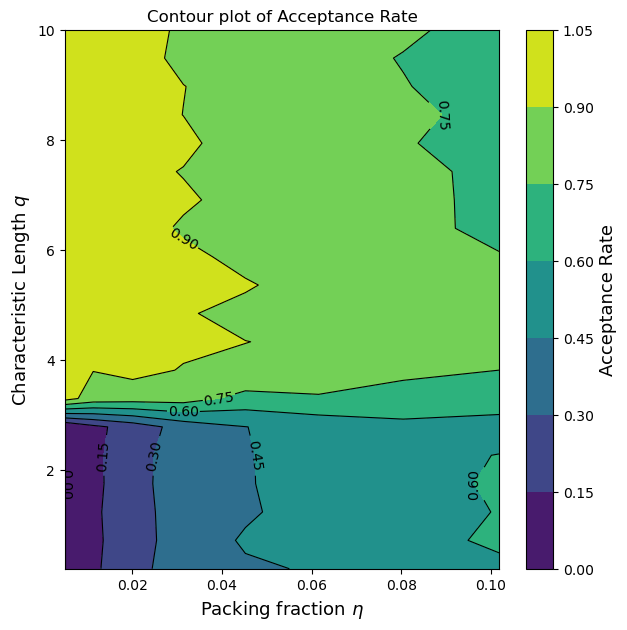

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = np.asarray([4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 16])  # Perfect squares
q = np.linspace(0.2, 10, 20)  # Range of q values
steps = 1000  # Number of steps

# Initialize variables
acceptance_rate = np.zeros((len(N), len(q)))  # Acceptance rate grid
eta = np.zeros(len(N))  # Packing fractions
Z = np.zeros((len(N), len(q)))  # Grid for Z values (acceptance rates)

# Loop over N and q to calculate acceptance rate
for i in range(len(N)):
    for j in range(len(q)):
        # Create a system (assuming HardDisks class is defined elsewhere)
        system = HardDisks(N[i], q[j], 100, 2, initial_conf='rectangular')
        
        # Compute acceptance rate and packing fraction
        rate = system.get_avg_acceptance(steps)
        acceptance_rate[i, j] = rate  # Save acceptance rate
        Z[i, j] = rate  # Assign to Z grid
        eta[i] = system.get_packing()  # Save packing fraction

# Create the meshgrid with eta (rows) and q (columns)
X, Y = np.meshgrid(eta, q, indexing='ij')  # Ensure consistent indexing with Z

# Debugging shapes
print(f"X.shape: {X.shape}, Y.shape: {Y.shape}, Z.shape: {Z.shape}")

# Plot
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
ax.set_title('Contour plot of Acceptance Rate')

# Filled contours
contourf = ax.contourf(X, Y, Z, cmap='viridis')

# Contour lines
contour = ax.contour(X, Y, Z, colors='black', linewidths=0.8)
ax.clabel(contour, inline=True, fontsize=10)

# Colorbar
cbar = fig.colorbar(contourf, ax=ax)
cbar.set_label('Acceptance Rate', fontsize=13)

# Axes labels
ax.set_xlabel(r'Packing fraction $\eta$', fontsize=13)
ax.set_ylabel(r'Characteristic Length $q$', fontsize=13)

plt.show()
